In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib import pyplot as plt
from tubes_dev import *

/home/haiy/pkg/miniconda3/envs/bim/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
l1 = pt(-5,0)
l2 = pt(3,-2)
l3 = pt(3,2)
ls = np.array([l1,l2,l3])
rs = np.array([1,1,1])
Y = NLets(ls,rs,corner_size=1)

In [9]:
Y.build_geometry()

In [33]:
p = Y.curves[2].panels[0]
p.y + 1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.22044605e-16, -3.10862447e-15,
       -1.99840144e-14, -7.37188088e-14, -1.72306613e-13, -2.71782596e-13])

In [25]:
for i,c in enumerate(Y.curves):
    for j,p in enumerate(c.panels):
        length = np.sum(np.abs(p.dt_da)*p.da)
        points = len(p.da)
        ratio = points/length
        if ratio > 300:
            print(ratio,i,j,sep='\t')

512.6662418188611	2	0
513.977948388647	2	1
513.977948388647	2	32
512.6662418188611	2	33
517.5805877956159	6	0
529.035202580776	6	1
313.14079955736787	6	5
327.0983318649656	6	6
340.8990809062187	6	7
354.1806112508752	6	8
354.1806112508752	6	17
340.8990809062187	6	18
327.0983318649656	6	19
313.14079955736787	6	20
529.035202580776	6	24
517.5805877956159	6	25
512.666241818861	10	0
513.977948388647	10	1
513.977948388647	10	32
512.666241818861	10	33


In [32]:
panel = c.panels[19]
np.abs(np.polynomial.legendre.Legendre.fit(
        panel.a, panel.t,deg=len(panel.a) - 1, domain=panel.domain).coef)

array([1.09329219e+00, 1.78272292e-09, 1.04378297e-12, 3.14719485e-13,
       4.53723754e-13, 7.13902256e-13, 3.42182909e-13, 2.79228903e-13,
       6.04130588e-13, 3.80779900e-13, 1.71770452e-13, 5.53376739e-13,
       4.29798723e-13, 8.45314115e-14, 5.28633518e-13, 4.95624899e-13])

In [34]:
np.abs(np.polynomial.legendre.Legendre.fit(
        panel.a, panel.t,deg=len(panel.a) - 1, domain=panel.domain).coef)

In [34]:
np.abs(np.polynomial.legendre.Legendre.fit(
        panel.a, panel.t,deg=len(panel.a) - 1, domain=panel.domain).coef)

In [39]:
np.log2(panel.domain[1]-panel.domain[0])

-27.0

In [40]:
from math_functions import *

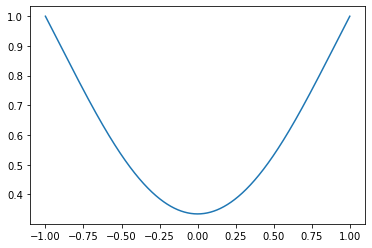

In [171]:
x = np.linspace(-1,1,1024)
y = np.array([convoluted_abs(t) for t in x])
plt.plot(x,y)

In [172]:
from scipy.integrate import quad

In [173]:
bump_def_int = quad(_bump, -1, 1, epsabs=1e-17, epsrel=1e-17)[0]

def convoluted_abs1_err(x,eps=1e-17):
    if np.abs(x) >= 1:
        return 0

    def b(y): return _bump(y)*np.abs(x-y)

    return quad(b, -1, 1, epsabs=eps, epsrel=eps)[1]



/tmp/ipykernel_22984/3194827781.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  bump_def_int = quad(_bump, -1, 1, epsabs=1e-17, epsrel=1e-17)[0]


/tmp/ipykernel_22984/3194827781.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(b, -1, 1, epsabs=eps, epsrel=eps)[1]
/tmp/ipykernel_22984/3194827781.py:9: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(b, -1, 1, epsabs=eps, epsrel=eps)[1]
/tmp/ipykernel_22984/3194827781.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b = quad(_bump,
/tmp/ipykernel_22984/3194827781.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved. 

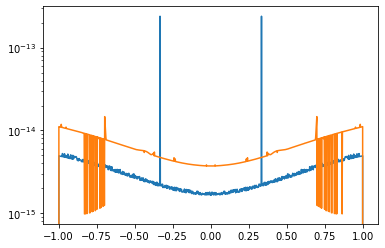

In [174]:
err1 = np.array([convoluted_abs1_err(t) for t in x])
err2 = np.array([convoluted_abs2_err(t) for t in x])
plt.semilogy(x,err1)
plt.semilogy(x,err2)

In [149]:
c = Corner(pt(-1,1),pt(1,1),pt(0,0))
c.build_affine_transform()
c.build()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/haiy/pkg/miniconda3/envs/bim/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_22984/99975100.py", line 3, in <cell line: 3>
    c.build()
  File "/home/haiy/proj/stokes2d/./src/curve.py", line 103, in build
    p1, p2 = self.split_a_panel(p)
  File "/home/haiy/proj/stokes2d/./src/curve.py", line 134, in split_a_panel
    y = self.y_fn(a)
  File "/home/haiy/proj/stokes2d/./src/curve.py", line 250, in <lambda>
    y_fn = lambda _, a: np.array([convoluted_abs(x) for x in a])
  File "/home/haiy/proj/stokes2d/./src/curve.py", line 250, in <listcomp>
    y_fn = lambda _, a: np.array([convoluted_abs(x) for x in a])
  File "/home/haiy/proj/stokes2d/./src/math_functions.py", line 109, in convoluted_abs
    return quad(b, -1, 1, epsabs=ERR, epsrel=ERR, full_output=1)[0]/bump_def_int
  File "/home/haiy/pkg/miniconda3/envs/bim/lib/pytho